<a href="https://colab.research.google.com/github/gitnicolas343/sistemas-computacionales-inteligentes/blob/main/Sadi_Nicolas_Mendoza_Soriano_Taller_SIC_3er_Corte_2025_1S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 3er Corte

## Ej 1

Usando algoritmos genéticos entrene los pesos de una red neuronal de tal forma que prediga la operación XOR. Dadas las siguientes entradas

data_inputs = numpy.array([[1, 1],[1, 0],[0, 1],[0, 0]])

genera las siguientes salidas

data_outputs = numpy.array([0,1,1,0])

Utilice una red con una capa oculta, y funciones de activación de tipo sigmoide tanto en la oculta como en la de salida de tipo sigmoide

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#datos
data_inputs = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
data_outputs = np.array([0, 1, 1, 0])


def sigmoid(x):
    return 1/(1+np.exp(-x))



def red_meuronal(datos,individuo):
    W1 = individuo[0:4].reshape(2, 2)
    b1 = individuo[4]                    #decidi incluir un bias (sesgo) en base a los apuntes del curso de machine learning
    W2 = individuo[5:7].reshape(2, 1)
    b2 = individuo[7]

    salida = list()

    for iter in range(len(datos)):            #para cada dato porpago hacia adelante la red
        dato = datos[iter]
        capa1 = sigmoid(np.dot(W1,dato) + b1)
        capa2 = sigmoid(np.dot(capa1,W2)+ b2)

        salida.append(capa2.item())           #almaceno la salida de la capa  que es la ultima, llega como un vector dentro de otro pero solo tiene un escala  asi que lo saco
    return salida

def mse( reales, salidas):                    #erro cuadratico es la funcion de  costo
    return np.mean((np.array(salidas)- np.array(reales))**2)

In [ ]:
#algoritmo genetico

def pobalcion_inicial(tamano_poblacion):                #por facilidad y analogo al problema de las 8 reinas  tomo los individuos como vectores de 8 entradas
    poblacion = list()                                  #en la funcion de la red los reestructuro y los tomo como parametros de la red
    for i in range(tamano_poblacion):
        poblacion.append(np.random.uniform(-2, 2, 8))
    return poblacion


def funcion_de_idoneidad(poblacion, data_inputs, data_outputs):  #evalua la idoneidad de la red
    idoneidades = list()                                         #almaceno las ideoneidades
    for individuo in poblacion:
        salidas = red_meuronal(data_inputs, individuo)         #evaluo la red con los parametros
        loss = mse(data_outputs, salidas)                      #calculo la perdida del mse
        idoneidades.append(1 / loss)                           #la inversa sera mi funcion de idoneidad
    return np.array(idoneidades)

def seleccion(poblacion,fun_idoneidad):                        #Retorne los 2 padres que resultan de la seleccion de tipo ruleta
    pesos = fun_idoneidad/np.sum(fun_idoneidad)               #probablidad relativa
    seleccion1 =np.random.choice(len(poblacion),replace = False ,size = 2, p = pesos )  #seleccion tipo ruleta
    return poblacion[seleccion1[0]], poblacion[seleccion1[1]]    #individuos seleccionados

def cross_over(padre1,padre2):
    # Retorna los dos hijos producto del cross-over entre padre1 y padre2
    #se selecciona aleatoriamente un punto de curze
    punto = np.random.randint(1, 8)
    hijo1 = np.concatenate([padre1[:punto], padre2[punto:]])     #ya que decidi trabajar mas con vectores que con listas uso concatenate de numpy para combinar los genes
    hijo2 = np.concatenate([padre2[:punto], padre1[punto:]])
    return hijo1, hijo2

def mutacion(hijo):                                             #muto una posicion aleatoria de los hijos siempre y cuando la porbabilidad caiga en el umbral de 0.2
    for i in range(8):
        if np.random.rand() < 0.2:                              #del condicional if
            hijo[i] += np.random.normal(0, 0.3)
    return hijo                                                 #la aplico para cada hijo

In [ ]:
#bucle principal
tamano_poblacion = 300
generaciones = 1000

poblacion = pobalcion_inicial(tamano_poblacion)
mejor_idenoidad_registrada = list()
promidenodades = list()


for generacion in range(generaciones):
    #para el primer individuo
    idenoidad = funcion_de_idoneidad(poblacion, data_inputs, data_outputs)
    promidenodades.append(np.mean(idenoidad))

    idenoidad_maxima = np.max(idenoidad)
    mejor_idenoidad_registrada.append(idenoidad_maxima)

    # selecciono del mejor individuo
    mejor_idx = np.argmax(idenoidad)
    nueva_generacion= poblacion[mejor_idx]
    if idenoidad_maxima > 1e4:

        print(f'Mejor Individuo: {nueva_generacion}')
        print(f'Prueba:{np.round(red_meuronal(data_inputs,nueva_generacion))}')
        print(f'Generacion:{generacion}')

        print('Parametro de la Red mejor entrenada:')
        print(f'W1:{nueva_generacion[0:4].reshape(2, 2)}')
        print(f'b1:{nueva_generacion[4]}')
        print(f'W2:{nueva_generacion[5:7].reshape(2, 1)}')
        print(f'b2:{nueva_generacion[7]}')
        break



    nueva_poblacion = [nueva_generacion]  # almaceno el mejor individuo
    #ciclo de la generacion
    while len(nueva_poblacion) < tamano_poblacion:
        # selecciono y asigno los mejores padres encontrados
        padre1, padre2 = seleccion(poblacion, idenoidad)

        # cruzo los padres
        hijo1, hijo2 = cross_over(padre1, padre2)

        #muto cada hijo
        hijo1 = mutacion(hijo1)
        hijo2 = mutacion(hijo2)

        nueva_poblacion.append(hijo1)                      #lleno la lista de poblacion y esta es mi generacion
        if len(nueva_poblacion) < tamano_poblacion:
            nueva_poblacion.append(hijo2)

    poblacion = nueva_poblacion                           #reasigno mi poblacion como la generacion anterior

    # control del proceso
    if generacion % 100 == 0:
        print(f"Generacion {generacion}: | Mejor idoneidad = {idenoidad_maxima}|")  #
        print('_____________________________________________________________')

Generacion 0: | Mejor idoneidad = 4.237139466142481|
_____________________________________________________________
Generacion 100: | Mejor idoneidad = 6.4247872013961045|
_____________________________________________________________
Mejor Individuo: [ 6.51885034 -6.05040735 -8.52450832  6.90031048 -3.43789748 10.23944735
 10.40902259 -5.13485907]
Prueba:[0. 1. 1. 0.]
Generacion:196
Parametro de la Red mejor entrenada:
W1:[[ 6.51885034 -6.05040735]
 [-8.52450832  6.90031048]]
b1:-3.4378974758745153
W2:[[10.23944735]
 [10.40902259]]
b2:-5.134859069837263


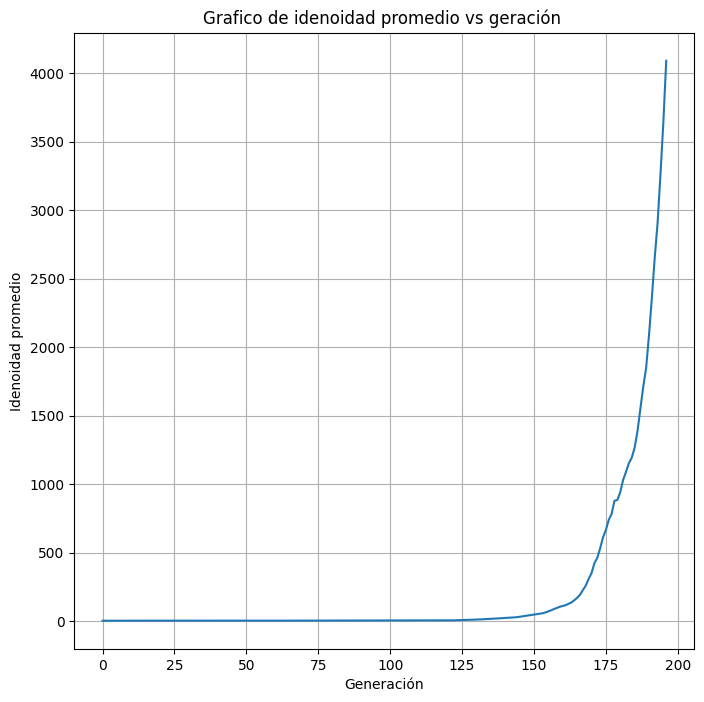

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(promidenodades)
plt.title('Grafico de idenoidad promedio vs geración ')
plt.xlabel('Generación')
plt.ylabel('Idenoidad promedio')
plt.grid()
plt.show()




## Ej 2

Desde el proyecto Gutenberg descargue varias obras de su autor favorito para generar un corpus. A partir de este realice el siguiente análisis lingüístico:

a) Realice una gráfica que muestre la frecuencia de los 5 n-gramas más comunes en el corpus.
b) Usando el corpus genere texto aleatorio que use el mismo estilo del autor seleccionado.
c) Calcule el td-idf de los textos y identifique y analice el tópico particular de cada obra

In [ ]:
!pip install markovify

from google.colab import drive
drive.mount('/content/drive')
from collections import Counter
import math
import nltk
import os
import markovify
nltk.download('punkt_tab') #hay que descargar este tokenizador

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
n = 3
corpus = '/content/drive/MyDrive/corpus'
folder = corpus

#funciones recicladas de codigo de clase y modificadas a conveniencia
def load_data(directory):
    contents = []

    # Read all files and extract words
    for filename in os.listdir(directory):
        with open(os.path.join(directory, filename)) as f:
            contents.extend([
                word.lower() for word in
                nltk.word_tokenize(f.read())
                if any(c.isalpha() for c in word)
            ])
    return contents


#solo necesito esta funcion del codigo de clase
def main(n,folder):                                                      #en este blolque cambie la carga de datos ya que la libreria sys estaba adapotada para entorno local de python
    """Calculate top term frequencies for a corpus of documents."""      #elimine las funciones excedentes que involucravban este modulo  y agrega una carga sencilla
                                                                         #emparejada con drive, concerve la funcion load_data
    corpus = load_data(folder)

    # Compute n-grams
    ngrams = Counter(nltk.ngrams(corpus, n))

    # Print most common n-grams
    ngramsarch = dict()
    for ngram, freq in ngrams.most_common(5):
        ngram1 = ''
        for i in ngram:
            ngram1 += f'{i} '
        ngramsarch[ngram1] = freq
    return ngramsarch
import matplotlib.pyplot as plt

def graficar(ngramas, n):
    etiquetas = list(ngramas.keys())
    valores = list(ngramas.values())

    plt.figure(figsize=(10, 5))
    plt.title(f'{n}-gramas más frecuentes en los libros de Mark Twain')
    plt.bar(etiquetas, valores, color='skyblue')
    plt.xlabel('Frecuencia')
    plt.ylabel(f'{n}-gramas')
    plt.grid()
    plt.show()

In [ ]:
n_grams_de_3_mas_comunes = main(3,corpus)
print(n_grams_de_3_mas_comunes)

{'it was a ': 285, 'out of the ': 225, 'there was a ': 199, 'one of the ': 164, 'it is a ': 138}


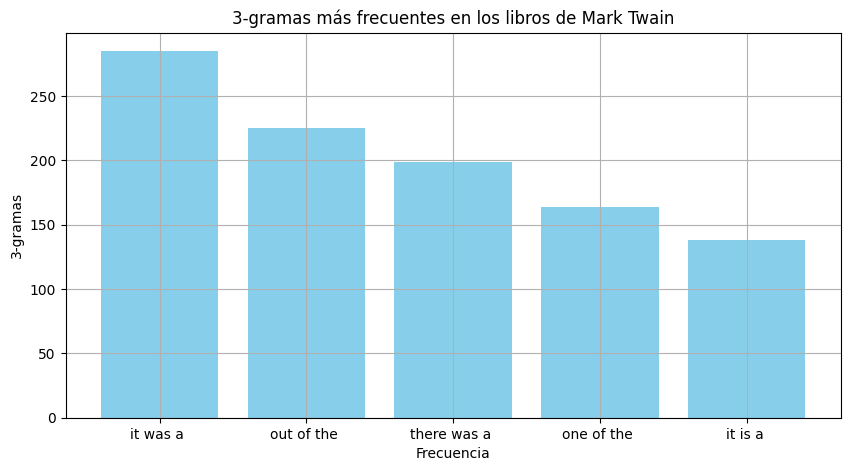

In [ ]:
graficar(n_grams_de_3_mas_comunes,3)

In [ ]:
n_grams_de_2_mas_comunes = main(2,corpus)
print(n_grams_de_3_mas_comunes)

{'it was a ': 285, 'out of the ': 225, 'there was a ': 199, 'one of the ': 164, 'it is a ': 138}


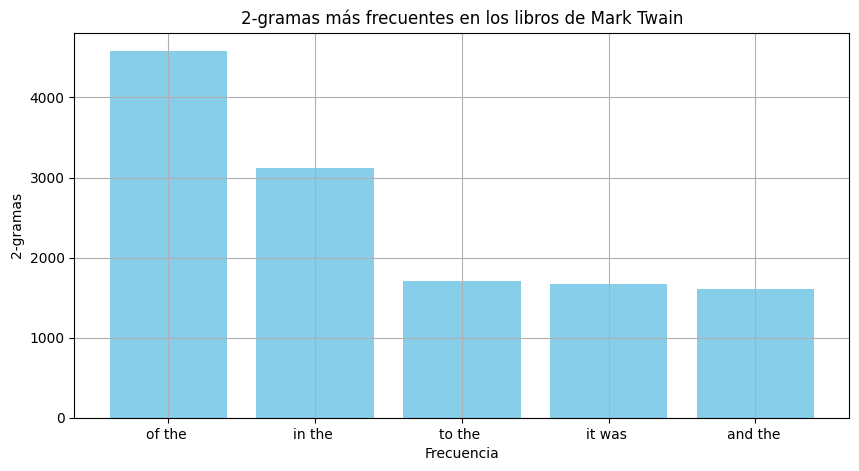

In [ ]:
graficar(n_grams_de_2_mas_comunes,2)

In [ ]:
text = ''           #almaceno la informacion de los textos en esta cadena
nombres_libros = ['The Prince and the Pauper .txt',
                  'The Adventures of Tom Sawyer.txt',
                  'The Innocents Abroad.txt',
                  "Connecticut Yankee in King Arthur's Court.txt",
                  'Life on the Mississippi.txt']

for archivo in nombres_libros:
    file_i = open(folder+'/'+archivo,encoding= 'utf-8')
    text += file_i.read()
    file_i.close()

# Train model
text_model = markovify.Text(text)

# Generate sentences
for i in range(5):
    print(text_model.make_sentence())
    print()


The more immediate scenery consisted of forty thousand inhabitants and place ourselves in accordance with paragraph 1.F.3, a full refund of any consequence in the whisperings of its great men, they had forced him to spare that nineteen years of Genoese and Neapolitans of to-day.

Next he essayed to tie the King’s command so precious a grace that marked the possession of extraordinary talent.

Then she sprang away and blend with the mere matter of twenty-five thousand, and the greatness of Venice were secured.

The company felt that all the ship's company there was music every where--choruses, string bands, brass bands, flutes, every thing.

Idiot, if he _had_ run across it was all the devils that be in the pit at the head of reserved steam on, here they can't.



In [ ]:
def main_tf_idf(direccion):
    """Calculate top TF-IDF for a corpus of documents."""


    corpus = load_data2(direccion)

    # Get all words in corpus
    print("Extracting words from corpus...")
    words = set()
    for filename in corpus:
        words.update(corpus[filename])

    # Calculate IDFs
    print("Calculating inverse document frequencies...")
    idfs = dict()
    for word in words:
        f = sum(word in corpus[filename] for filename in corpus)
        idf = math.log(len(corpus) / f)
        idfs[word] = idf

    # Calculate TF-IDFs
    print("Calculating term frequencies...")
    tfidfs = dict()
    for filename in corpus:
        tfidfs[filename] = []
        for word in corpus[filename]:
            tf = corpus[filename][word]
            tfidfs[filename].append((word, tf * idfs[word]))

    # Sort and get top 5 TF-IDFs for each file
    print("Computing top terms...")
    for filename in corpus:
        tfidfs[filename].sort(key=lambda tfidf: tfidf[1], reverse=True)
        tfidfs[filename] = tfidfs[filename][:30]

    # Print results
    print()
    for filename in corpus:
        print(filename)
        for term, score in tfidfs[filename]:
            print(f"    {term}: {score:.4f}")


def load_data2(directory):
    files = dict()
    for filename in os.listdir(directory):
        with open(os.path.join(directory, filename)) as f:

            # Extract words
            contents = [
                word.lower() for word in
                nltk.word_tokenize(f.read())
                if word.isalpha()
            ]

            # Count frequencies
            frequencies = dict()
            for word in contents:
                if word not in frequencies:
                    frequencies[word] = 1
                else:
                    frequencies[word] += 1
            files[filename] = frequencies

    return files



main_tf_idf(corpus)

Extracting words from corpus...
Calculating inverse document frequencies...
Calculating term frequencies...
Computing top terms...

The Prince and the Pauper .txt
    hendon: 259.1195
    canty: 156.1155
    prince: 99.1002
    thou: 64.2653
    hugh: 62.7681
    tom: 60.9182
    hertford: 59.5492
    thy: 51.5462
    lt: 37.0171
    offal: 33.7982
    tis: 31.6712
    edward: 30.2376
    seal: 29.3213
    thee: 28.7855
    edith: 24.1416
    humphrey: 24.1416
    nan: 22.5321
    norfolk: 22.5321
    prithee: 21.9910
    dost: 21.9910
    chancellor: 20.9227
    hugo: 19.9222
    hast: 19.4114
    ruffler: 17.7038
    shalt: 17.3681
    hath: 17.1821
    liege: 16.4932
    westminster: 16.0944
    hose: 16.0944
    southwark: 16.0944
The Adventures of Tom Sawyer.txt
    t: 329.9934
    huck: 215.3283
    ll: 210.7469
    becky: 175.4287
    tom: 174.2751
    joe: 150.2717
    re: 125.5362
    sid: 123.9267
    ain: 109.0386
    don: 108.8059
    polly: 90.1285
    thatcher: 74.0341
  

segun el tf-idf:

1. The Prince and the Pauper: el titulo da algo de informacion trivial sobre lo que trata, nobleza y pobreza, sin enbargo identificamos personajes principales como el apellido de tom 'canty' , edith , hught y su apellido hendon, algo tribial y verificable si se lee la obra, ahora llama la atencion la identificacion del termino  'hath' que traduce tiene, y  'ruffler' vagabundo que da una clave importante en el contenido de la obra que va por ese escenario social, asi como liege soberano, da un contexto de lo que trata la obra.

2. The Adventures of Tom Sawyer: destacan nuevamente los personajes principales y las abreviaciones de las palabras dan una idea de un ingles poco formal y arcaico tal vez de personas menores.

3. The Innocents Abroad: parace segun los nombres propios como jerusalen, damasco,venecia sujieren sitios de viaje, ademas de salvador, sugiere ademas una obra que gira entorno a una premisa religiosa , pobablemente antigua  o con relevancia antigua y mayoritariamente religiosa con respecto al cristianismo o a roma.

4. Connecticut Yankee in King Arthur's Court: nombres como merlin , arthurt ,luncelot, clarence, parecen nombre medievales, ademas se mencionan caballeros y castillos, parece que la obra esta ambientada o gira entorno a la edad media  y a una cruzada o batalla entre buenos y malos aunque no se menciona dragones parece que solo se ambienta en ese tiempo.

5. Life on the Mississippi:lugares como  orleans y vicksburg sitios de estados unidos o antiguos lugares de este, en el sur del pais, se mencionan  botes y pilotos,  sugiere tambien un viaje o descripcion de lugares entorno a como el titulo lo indica al rio Missippi porbablemente navegacion o trabecia o analizis o descriopcion de la cutura entorno al rio.


## Ej 3

Utilice el dataset djunto sobre reseñas de películas con etiquetas positivas y negativas. Construya la bolsa de palabras que corresponden a revisiones negativas y positivas. A partir de allí, entrene un modelo Naive-Bayes, para predecir si una nueva revisión es positiva o negativa.

In [ ]:
import pandas as pd     #decidi usar pandas

ruta2 = '/content/drive/MyDrive/datos/texts.csv'
datos = pd.read_csv(ruta2)

positivos = datos[datos['label'] == 'positive'].drop(columns=['is_valid'], errors='ignore')
negativos = datos[datos['label'] == 'negative'].drop(columns=['is_valid'], errors='ignore')

positivos_arreglos = positivos['text']
negativos_arreglos = negativos['text']

In [ ]:
import nltk
import os
import sys


def main_naive(positives_1, negatives_1):

    #acomode esta carga de datos para que recibiera un pd.dataframe mas oractico que documentos txt
    positives = list()
    for texto in positives_1:
        positives.append(extract_words(texto))
    negatives = list()
    for texto in negatives_1:
        negatives.append(extract_words(texto))

    # Create a set of all words
    words = set()
    for document in positives:
        words.update(document)
    for document in negatives:
        words.update(document)

    # Extract features from text
    training = []
    training.extend(generate_features(positives, words, "Positive"))
    training.extend(generate_features(negatives, words, "Negative"))

    # Classify a new sample
    classifier = nltk.NaiveBayesClassifier.train(training)
    classifier.show_most_informative_features(10)           #segun la documentacion me da informacion de las features mas relvante para asi probar cuales
                                                            #pueden armar frases que expresen sentimientos negativos y positos

    s = input("s: ")
    result = (classify(classifier, s, words))
    for key in result.samples():
        print(f"{key}: {result.prob(key):.4f}")


def extract_words(document):
    return set(
        word.lower() for word in nltk.word_tokenize(document)
        if any(c.isalpha() for c in word)
    )


def load_data(directory):
    result = []
    for filename in ["positivos.txt", "negativos.txt"]:
        with open(os.path.join(directory, filename)) as f:
            result.append([
                extract_words(line)
                for line in f.read().splitlines()
            ])
    return result


def generate_features(documents, words, label):
    features = []
    for document in documents:
        features.append(({
            word: (word in document)
            for word in words
        }, label))
    return features


def classify(classifier, document, words):
    document_words = extract_words(document)
    features = {
        word: (word in document_words)
        for word in words
    }
    return classifier.prob_classify(features)

In [ ]:
#basicamente busque las palabras que mas peso daban para una opinion negativa y arme frases triviales con ellas
"the movie was beautifully made and absolutely stunning"
main_naive(positivos_arreglos,negativos_arreglos)

Most Informative Features
                    crap = True           Negati : Positi =     18.5 : 1.0
             beautifully = True           Positi : Negati =     11.4 : 1.0
                    fake = True           Negati : Positi =     10.6 : 1.0
                   worst = True           Negati : Positi =      9.8 : 1.0
                stunning = True           Positi : Negati =      9.5 : 1.0
                 garbage = True           Negati : Positi =      9.4 : 1.0
                    ride = True           Positi : Negati =      8.4 : 1.0
                   naked = True           Negati : Positi =      8.2 : 1.0
                     sat = True           Negati : Positi =      8.2 : 1.0
                somebody = True           Negati : Positi =      8.2 : 1.0
s: "the movie was beautifully made and absolutely stunning
Positive: 1.0000
Negative: 0.0000


In [ ]:
"this movie was the worst crap ever full of fake scenes and total garbage"
main_naive(positivos_arreglos,negativos_arreglos)

Most Informative Features
                    crap = True           Negati : Positi =     18.5 : 1.0
             beautifully = True           Positi : Negati =     11.4 : 1.0
                    fake = True           Negati : Positi =     10.6 : 1.0
                   worst = True           Negati : Positi =      9.8 : 1.0
                stunning = True           Positi : Negati =      9.5 : 1.0
                 garbage = True           Negati : Positi =      9.4 : 1.0
                    ride = True           Positi : Negati =      8.4 : 1.0
                   naked = True           Negati : Positi =      8.2 : 1.0
                     sat = True           Negati : Positi =      8.2 : 1.0
                somebody = True           Negati : Positi =      8.2 : 1.0
s: this movie was the worst crap ever full of fake scenes and total garbage
Positive: 0.0379
Negative: 0.9621


## Ej 4

Modifique el código para entrenar redes neuronales para realizar una tarea de clasificación que le encomienda una empresa que ha tomado datos de sus clientes. La tabla contiene la siguiente informacion

- Edad: Edad de un cliente
- Salario: Salario en miles de dólares
- Compro / No Compro: Variable booleana (0 - No Compro) y (1 - Compró)

Para esta tarea considere la siguiente arquitectura de la red

- 1 Capa oculta con 5 unidades
- 1 neurona en la capa de salida con función de activacion sigmoide
- Optimizador Adagrad, métirca tipo Accuracy y Función de Pérdida Binary Cross-entropy
- Tamaño del conjunto de prueba 25%
- Número de epocas 100

Qué tipo de función de activación entre la siguientes opciones funciona mejora en la capa oculta en esta tarea:

- "relu", "tanh" o "sigmoid"

In [ ]:
# TODO
import csv
import tensorflow as tf
from sklearn.model_selection import train_test_split

ruta = '/content/drive/MyDrive/datos/Social_Network_Ads.csv'

# Read data in from file
with open(ruta) as f:
    reader = csv.reader(f)
    next(reader)

    data = []
    for row in reader:
        age = float(row[0])
        salary = float(row[1])
        label = int(row[2])
        data.append({"evidence": [age,salary],"label": label
        })

evidence = np.array([row["evidence"] for row in data])
labels = np.array([row["label"] for row in data])
X_training, X_testing, y_training, y_testing = train_test_split(evidence, labels, test_size=0.25)

In [ ]:
#como varia deoendiendo del conjunto voy a entrenar varias veces  para sacar el maccuracy promdio y ver cual se desempeña mejor

funciones = ["relu", "tanh" , "sigmoid"]

rendimientos = {"relu":0 , "tanh":0, "sigmoid":0}

for funcion in funciones:
        for i in range(50):
            model =tf.keras.models.Sequential()
            model.add(tf.keras.layers.Dense(5, input_shape=(2,), activation=funcion))
            model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
            model.compile( optimizer="Adagrad", loss="binary_crossentropy",  metrics=["accuracy"])
            model.fit(X_training, y_training, epochs=100, verbose = 0)
            loss, accuracy = model.evaluate(X_testing, y_testing, verbose=0)  #verbose me permite hacer que no muestre el entrenamiento
            rendimientos[funcion] += accuracy

In [ ]:
print("Resultados promedio después de 10 repeticiones:")
for funcion in funciones:
    promedio = rendimientos[funcion] / 50
    print(f"{funcion}: {promedio}")

Resultados promedio después de 10 repeticiones:
relu: 0.5579999959468842
tanh: 0.5079999995231629
sigmoid: 0.5319999980926514


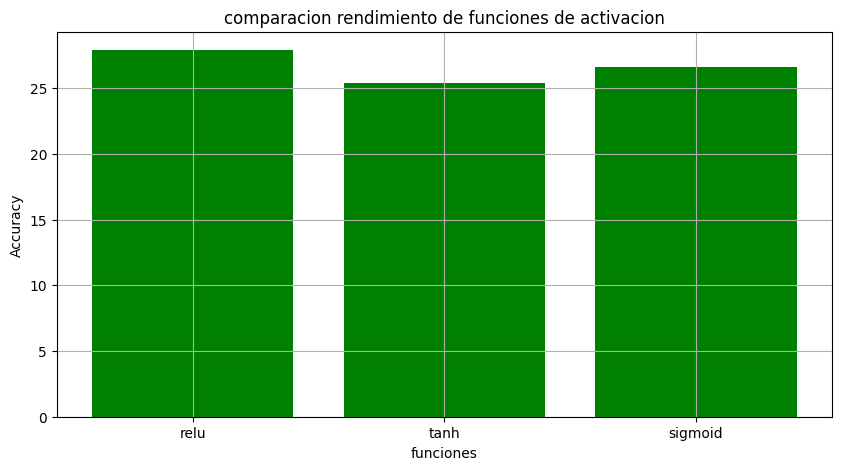

In [ ]:
funciones = list(rendimientos.keys())
valores = list(rendimientos.values())

plt.figure(figsize=(10, 5))
plt.title('comparacion rendimiento de funciones de activacion')
plt.bar(funciones, valores, color='green')
plt.xlabel('funciones')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

despues de 50 ciclos de entranmiento para cada funcion, relu parece tener el mejor desempeño.